<a href="https://colab.research.google.com/github/ZHBIT92/colob_project/blob/master/%E9%9B%A8%E8%A1%B0%E6%A0%A1%E6%AD%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#安装miniconda库
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -u /usr/local

In [0]:
#安装wradlib库
!pip install wradlib
#安装arm_pyart库
!pip install arm_pyart

In [0]:
"""
Correct reflectivity attenuation
In this example the reflectivity attenuation is calculated and then corrected
for a polarimetric radar using a Z-PHI method implemented in Py-ART.
"""

import matplotlib.pyplot as plt
import pyart

#RADAR_NAME = '/content/drive/My Drive/radar_data/sex_20120520_0641.nc'
#RADAR_NAME = '/content/drive/My Drive/radar_data/sgpxsaprrhicmacI5.c0.20110524.015604_NC4.nc'
RADAR_NAME = '/content/drive/My Drive/radar_data/swx_20120520_0641.nc'

# read in the data
radar = pyart.io.read_cfradial(RADAR_NAME)


In [10]:

# remove existing corrections
radar.fields.pop('specific_attenuation')
radar.fields.pop('corrected_reflectivity_horizontal')

# perform attenuation correction
spec_at, cor_z = pyart.correct.calculate_attenuation(
    radar, 0, refl_field='reflectivity_horizontal',
    ncp_field='norm_coherent_power', rhv_field='copol_coeff',
    phidp_field='proc_dp_phase_shift')
radar.add_field('specific_attenuation', spec_at)
radar.add_field('corrected_reflectivity_horizontal', cor_z)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [0]:
#色标设置模块
import matplotlib.colors as col
z_cdict = ['#23eceb','#13a0dc','#0029f0','#2bfc3e','#22c531',
             '#188e23','#fffc42','#e5bd33','#fd8d2a','#fd8d2a','#fc0019','#a30011',
             '#63000a','#fc28f9','#9559c3','#FFFFFF']
z_cmap = col.ListedColormap(z_cdict)
z_ticks = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
z_norm = col.BoundaryNorm(z_ticks, z_cmap.N, clip=True)

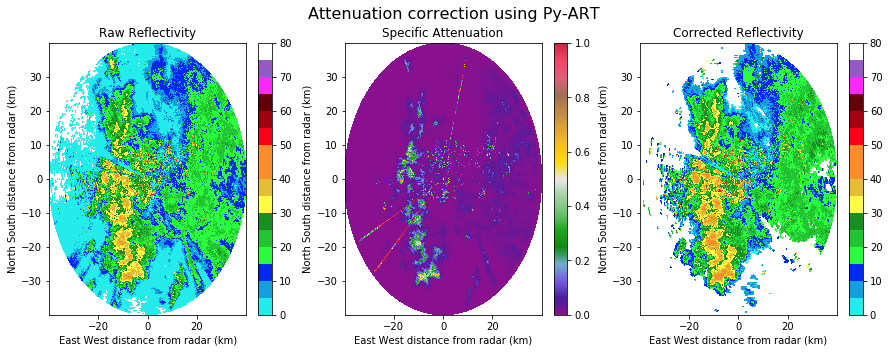

In [15]:
# create the plot
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131)
display = pyart.graph.RadarDisplay(radar)
#display.plot('reflectivity_horizontal', 0, ax=ax1, vmin=0, vmax=60.,
#             colorbar_label='', title='Raw Reflectivity')
display.plot('reflectivity_horizontal', 0, ax=ax1, vmin=0, vmax=80,cmap = z_cmap,
             colorbar_label='', title='Raw Reflectivity')
ax2 = fig.add_subplot(132)
display.plot('specific_attenuation', 0, vmin=0, vmax=1.0,
             colorbar_label='', ax=ax2, title='Specific Attenuation')

ax3 = fig.add_subplot(133)
display = pyart.graph.RadarDisplay(radar)
display.plot('corrected_reflectivity_horizontal', 0, vmin=0, vmax=80,cmap = z_cmap,
             colorbar_label='', ax=ax3, title='Corrected Reflectivity')

plt.suptitle('Attenuation correction using Py-ART', fontsize=16)
plt.show()